In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
jobs=pd.read_csv('Uncleaned_DS_jobs.csv')

In [8]:
jobs.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [9]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [10]:
jobs.drop("Competitors",axis=1,inplace=True)

In [11]:
jobs=jobs.replace("-1","")

In [12]:
jobs=jobs.replace("",np.nan)

In [13]:
jobs=jobs.drop(jobs[jobs.isna().sum(axis=1)>5].index)

In [14]:
x=jobs.drop("Rating",axis=1)
y=jobs['Rating']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()

In [41]:
jobs['Job Title']=encoder.fit_transform(jobs['Job Title'])
jobs['Salary Estimate']=encoder.fit_transform(jobs['Salary Estimate'])
# jobs.drop(columns=["Job Description","Company Name"],axis=1,inplace=True)
# jobs.drop(columns=["Company Name"],axis=1,inplace=True)
jobs['Location']=encoder.fit_transform(jobs['Location'])
jobs['Headquarters']=encoder.fit_transform(jobs['Headquarters'])
jobs['Founded']=encoder.fit_transform(jobs['Founded'])
jobs['Size']=encoder.fit_transform(jobs['Size'])
jobs['Type of ownership']=encoder.fit_transform(jobs['Type of ownership'])
jobs['Industry']=encoder.fit_transform(jobs['Industry'])
jobs['Sector']=encoder.fit_transform(jobs['Sector'])
jobs['Revenue']=encoder.fit_transform(jobs['Revenue'])


In [42]:
jobs

,index,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,0,153,7,3.1,117,141,2,76,6,30,12,12
1,1,49,7,4.2,35,88,4,54,2,42,4,0
2,2,49,7,3.8,19,27,2,65,8,11,4,4
3,3,49,7,3.5,118,14,5,83,2,15,13,4
4,4,49,7,2.9,117,141,6,81,1,1,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
665,665,49,1,3.8,188,213,3,88,1,27,11,9
666,666,49,1,4.0,19,32,2,93,2,5,3,4
667,667,49,1,3.6,61,72,2,73,1,1,4,12
670,670,49,1,5.0,159,184,0,0,1,1,4,1


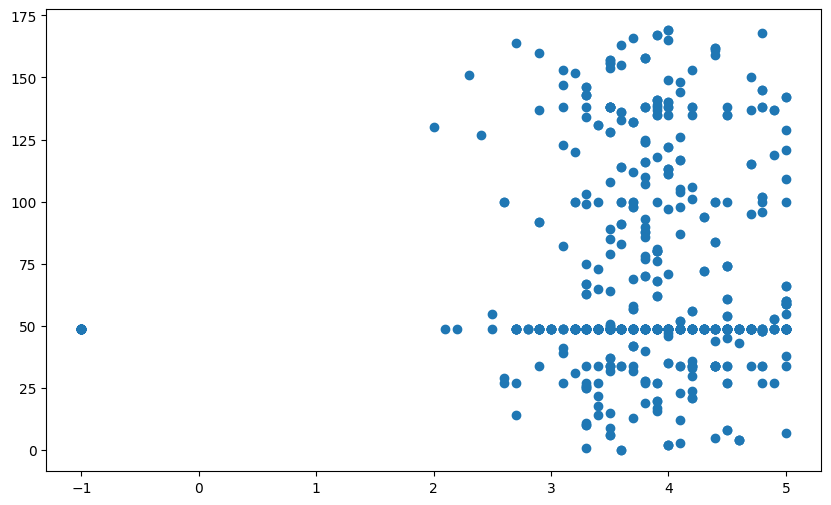

In [50]:
plt.figure(figsize=(10,6)) 
plt.plot(jobs['Rating'],jobs['Job Title'],'o')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [53]:
x=jobs.drop("Rating",axis=1)
y=jobs['Rating']

In [54]:
for i in range(1,len(x.columns)+1):
    pca=PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)
    model=LinearRegression()
    model.fit(x_train,y_train)
    print(i,model.score(x_test,y_test))

1 -0.016156982324438074
2 -0.013711887940625722
3 -0.013287644263948906
4 -0.009843121059997184
5 0.07153054366838574
6 0.08977534447739222
7 0.08972901562481239
8 0.10990682788630557
9 0.110691121486436
10 0.12336602305693278
11 0.11449326665519233


In [55]:
pca=PCA(n_components=6)
x_pca=pca.fit_transform(x)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [57]:
regression=LinearRegression()
regression.fit(x_train,y_train)
regression.score(x_test,y_test)

0.08977534447739222